In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


import pandas as pd
sales_predictions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02 Week 2: Pandas/sales_predictions.csv')
pd.set_option('display.width',250)
pd.set_option('display.max_columns',15)
pd.set_option('display.min_rows', 50)
print(sales_predictions.shape)
print(sales_predictions.head(2))


(8523, 12)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30          Low Fat         0.016047        Dairy  249.8092            OUT049                       1999      Medium               Tier 1  Supermarket Type1          3735.1380
1           DRC01         5.92          Regular         0.019278  Soft Drinks   48.2692            OUT018                       2009      Medium               Tier 3  Supermarket Type2           443.4228


In [6]:
#1) How many rows and columns?
print('Shape: ', sales_predictions.shape)


Shape:  (8523, 12)


In [7]:
#2) What are the datatypes of each variable?
print(sales_predictions.dtypes)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [8]:
#3) Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().sum()


0

In [9]:
#4) Identify missing values.
sales_predictions.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#5.1) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

#Data Observations: 
#1) This groupby view shows us 'Tier 2' "Outlet_Location_Type" values so far belong to the 'Small' "Outlet_Size" category.
#2) As in the above, we see 'Supermarket Type3' "Outlet_Type" values so far belong to the 'Medium' "Outlet_Size" category.
#3) As in the above, we see 'Grocery Store' "Outlet_Type" values so far belong to the 'Small' "Outlet_Size" category.
print(sales_predictions.groupby(['Outlet_Size','Outlet_Location_Type','Outlet_Type'])[['Outlet_Identifier']].count())

#Result Validation for #1 to confirm replacement criteria is coded correctly and gives expected results: 
  #1 Find Count of 'NaN' in "Outlet_Size" for rows where "Outlet_Location_Type" is 'Tier 2'. This will be the criteria for renaming NaN to 'Small'
print('\n\nShow base counts of values in Outlet_Size: \n',sales_predictions['Outlet_Size'].value_counts())
filter_Tier2_OutletLocationType = sales_predictions['Outlet_Location_Type']== 'Tier 2'
filter_NaN_OutletSize = sales_predictions['Outlet_Size'].isna()
print('\n\nExpected increase of Small counts for observation 1: \n',sales_predictions[filter_Tier2_OutletLocationType & filter_NaN_OutletSize].isna().sum()) #Tells us if the replacement is done correctly we should see an addition of 1855 'Small' values. 2388 + 1855 = 4243 'Small' values after data cleansing using observation 1

  #2 repeat the same for observation 2.
filter_Supermarket3_OutletType = sales_predictions['Outlet_Type']== 'Supermarket Type3'
print('\n\nExpected increase of Medium counts for observation 2: \n',sales_predictions[filter_Supermarket3_OutletType & filter_NaN_OutletSize & ~filter_Tier2_OutletLocationType].isna().sum())   #the ~ not filter is to exclude any matches from prior step. The data set actually includes no records with 'Supermarket Type3' and 'NaN' for "Outlet_Size"

  #3repeat the same for observation 3.
filter_GroceryStore_OutletType = sales_predictions['Outlet_Type']== 'Grocery Store'
print('\n\nExpected increase of Small counts for observation 3: \n',sales_predictions[filter_GroceryStore_OutletType & filter_NaN_OutletSize & ~filter_Tier2_OutletLocationType].isna().sum())   #Data cleansing using observation 3 should result in an additional 555 'Small' values above the solution for observation 1. 4243 + 555 = 4798.



                                                    Outlet_Identifier
Outlet_Size Outlet_Location_Type Outlet_Type                         
High        Tier 3               Supermarket Type1                932
Medium      Tier 1               Supermarket Type1                930
            Tier 3               Supermarket Type2                928
                                 Supermarket Type3                935
Small       Tier 1               Grocery Store                    528
                                 Supermarket Type1                930
            Tier 2               Supermarket Type1                930


Show base counts of values in Outlet_Size: 
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Expected increase of Small counts for observation 1: 
 Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP           

In [11]:
#5.2) Data Cleansing based on observations 1 and 3 in step 5.1

df = sales_predictions   #setting a new dataframe as to not overwrite the original counts identified in step 5.1 above

# STACKOVERFLOW SOLUTION FROM SHERLIN   df.loc[(df["pos"] == "GK") & (df["goals"].isnull()), 'goals'].fillna(0, inplace=True)    <<<---- SAMPLE SOLUTION did not work with inplace=True for some reason... Hence used the below solution to overwrite the section of the frame

#Solution for Observation 1
df.loc[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = df.loc[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Size'].isnull()), 'Outlet_Size'].fillna(value= 'Small')
print('\n\nExpecting 1855 additional Small values for a total of 4243 Small values from observation 1: \n',df['Outlet_Size'].value_counts())

#Solution for Observation 3
#3) As in the above, we see 'Grocery Store' "Outlet_Type" values so far belong to the 'Small' "Outlet_Size" category.
df.loc[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = df.loc[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'].isnull()), 'Outlet_Size'].fillna(value= 'Small')
print('\n\nExpecting 555 additional Small values for a total of 4798 Small values from observation 3: \n',df['Outlet_Size'].value_counts())





Expecting 1855 additional Small values for a total of 4243 Small values from observation 1: 
 Small     4243
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


Expecting 555 additional Small values for a total of 4798 Small values from observation 3: 
 Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


In [12]:
#5.3) Data Cleansing Thoughts for "Item_Weight"- Items of the same type should weigh a similar amount
print(sales_predictions['Item_Type'].value_counts())

avg_wt_Baking_Goods = sales_predictions.loc[sales_predictions['Item_Type']== 'Baking Goods','Item_Weight'].mean()
avg_wt_Breads = sales_predictions.loc[sales_predictions['Item_Type']== 'Breads','Item_Weight'].mean()
avg_wt_Breakfast = sales_predictions.loc[sales_predictions['Item_Type']== 'Breakfast','Item_Weight'].mean()
avg_wt_Canned = sales_predictions.loc[sales_predictions['Item_Type']== 'Canned','Item_Weight'].mean()
avg_wt_Dairy = sales_predictions.loc[sales_predictions['Item_Type']== 'Dairy','Item_Weight'].mean()
avg_wt_Frozen_Foods = sales_predictions.loc[sales_predictions['Item_Type']== 'Frozen Foods','Item_Weight'].mean()
avg_wt_Fruits_and_Vegetables = sales_predictions.loc[sales_predictions['Item_Type']== 'Fruits and Vegetables','Item_Weight'].mean()
avg_wt_Hard_Drinks = sales_predictions.loc[sales_predictions['Item_Type']== 'Hard Drinks','Item_Weight'].mean()
avg_wt_Health_and_Hygiene = sales_predictions.loc[sales_predictions['Item_Type']== 'Health and Hygiene','Item_Weight'].mean()
avg_wt_Household = sales_predictions.loc[sales_predictions['Item_Type']== 'Household','Item_Weight'].mean()
avg_wt_Meat = sales_predictions.loc[sales_predictions['Item_Type']== 'Meat','Item_Weight'].mean()
avg_wt_Others = sales_predictions.loc[sales_predictions['Item_Type']== 'Others','Item_Weight'].mean()
avg_wt_Seafood = sales_predictions.loc[sales_predictions['Item_Type']== 'Seafood','Item_Weight'].mean()
avg_wt_Snack_Foods = sales_predictions.loc[sales_predictions['Item_Type']== 'Snack Foods','Item_Weight'].mean()
avg_wt_Soft_Drinks = sales_predictions.loc[sales_predictions['Item_Type']== 'Soft Drinks','Item_Weight'].mean()
avg_wt_Starchy_Foods = sales_predictions.loc[sales_predictions['Item_Type']== 'Starchy Foods','Item_Weight'].mean()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [13]:
#5.4) 
#switching back to the df dataframe for modifications
df.loc[(df['Item_Type'] == 'Baking Goods') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Baking Goods') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Baking_Goods)
df.loc[(df['Item_Type'] == 'Breads') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Breads') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Breads)
df.loc[(df['Item_Type'] == 'Breakfast') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Breakfast') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Breakfast)
df.loc[(df['Item_Type'] == 'Canned') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Canned') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Canned)
df.loc[(df['Item_Type'] == 'Dairy') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Dairy') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Dairy)
df.loc[(df['Item_Type'] == 'Frozen Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Frozen Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Frozen_Foods)
df.loc[(df['Item_Type'] == 'Fruits and Vegetables') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Fruits and Vegetables') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Fruits_and_Vegetables)
df.loc[(df['Item_Type'] == 'Hard Drinks') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Hard Drinks') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Hard_Drinks)
df.loc[(df['Item_Type'] == 'Health and Hygiene') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Health and Hygiene') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Health_and_Hygiene)
df.loc[(df['Item_Type'] == 'Household') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Household') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Household)
df.loc[(df['Item_Type'] == 'Meat') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Meat') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Meat)
df.loc[(df['Item_Type'] == 'Others') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Others') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Others)
df.loc[(df['Item_Type'] == 'Seafood') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Seafood') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Seafood)
df.loc[(df['Item_Type'] == 'Snack Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Snack Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Snack_Foods)
df.loc[(df['Item_Type'] == 'Soft Drinks') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Soft Drinks') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Soft_Drinks)
df.loc[(df['Item_Type'] == 'Starchy Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'] = df.loc[(df['Item_Type'] == 'Starchy Foods') & (df['Item_Weight'].isnull()), 'Item_Weight'].fillna(value= avg_wt_Starchy_Foods)

print(df[df['Item_Weight'].isna()])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [14]:
#6) Confirm that there are no missing values after addressing them.
print('\n\nRemaining NaN: \n',df.isna().sum())




Remaining NaN: 
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Variable Name	Description
Item_Identifier	Unique product ID
Item_Weight	Weight of product
Item_Fat_Content	Whether the product is low fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product
Item_Type	The category to which the product belongs
Item_MRP	Maximum Retail Price (list price) of the product
Outlet_Identifier	Unique store ID
Outlet_Establishment_Year	The year in which store was established
Outlet_Size	The size of the store in terms of ground area covered
Outlet_Location_Type	The type of area in which the store is located
Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.

In [15]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
print('Original DataFrame: \n', sales_predictions.value_counts())
#In "Item_Fat_Content" 'LF' should be renamed 'Low Fat' and 'reg' should be renamed 'Regular'

df.replace({'Item_Fat_Content':'LF'},'low fat', inplace = True)
df.replace({'Item_Fat_Content':'reg'},'Regular', inplace = True)
print('\n\nCleansed DataFrame: \n',df['Item_Fat_Content'].value_counts())


Original DataFrame: 
 Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
NCZ54            14.650000    Low Fat           0.083699         Household              163.4552  OUT018             2009                       Medium       Tier 3                Supermarket Type2  2599.2832            1
FDJ27            17.700000    Regular           0.122565         Meat                   103.8674  OUT017             2007                       Small        Tier 2                Supermarket Type1  1528.0110            1
FDJ22            12.987880    Low Fat           0.092464         Snack Foods            190.9504  OUT019             1985                       Small        Tier 1                Grocery Store      383.5008             1
                 18.750000    Low Fat           0.052800         Snack Foods            193.2504  O

In [16]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

print(df.dtypes, '\n\n')

numbercolumns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for x in numbercolumns:
  print('Minimum Value of ', x, df[x].min())
  print('Maximum Value of ', x, df[x].max())
  print('Mean Value of ', x, df[x].mean())
  print('\n\n')



Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 


Minimum Value of  Item_Weight 4.555
Maximum Value of  Item_Weight 21.35
Mean Value of  Item_Weight 12.857890005168949



Minimum Value of  Item_Visibility 0.0
Maximum Value of  Item_Visibility 0.328390948
Mean Value of  Item_Visibility 0.06613202877895127



Minimum Value of  Item_MRP 31.29
Maximum Value of  Item_MRP 266.8884
Mean Value of  Item_MRP 140.9927819781768



Minimum Value of  Outlet_Establishment_Year 1985
Maximum Value of  Outlet_Establishment_Year 2009
Mean Value of  Outlet_Establishment_Year 1997.8318667135984



Minim

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.head())

#Project 1, Part 3 will begin numbering bulleted tasks with the letter C.

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30          Low Fat         0.016047                  Dairy  249.8092            OUT049                       1999      Medium               Tier 1  Supermarket Type1          3735.1380
1           DRC01         5.92          Regular         0.019278            Soft Drinks   48.2692            OUT018                       2009      Medium               Tier 3  Supermarket Type2           443.4228
2           FDN15        17.50          Low Fat         0.016760                   Meat  141.6180            OUT049                       1999      Medium               Tier 1  Supermarket Type1          2097.2700
3           FDX07        19.20          Regular         0.000000  Fruits and Vegetables  182.0950            OUT010                       1998  

In [55]:
df["Quantity_Sold"] = df["Item_Outlet_Sales"]/df["Item_MRP"]
print(df.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Quantity_Sold
0           FDA15         9.30          Low Fat         0.016047                  Dairy  249.8092            OUT049                       1999      Medium               Tier 1  Supermarket Type1          3735.1380      14.951963
1           DRC01         5.92          Regular         0.019278            Soft Drinks   48.2692            OUT018                       2009      Medium               Tier 3  Supermarket Type2           443.4228       9.186454
2           FDN15        17.50          Low Fat         0.016760                   Meat  141.6180            OUT049                       1999      Medium               Tier 1  Supermarket Type1          2097.2700      14.809346
3           FDX07        19.20          Regular         0.000000  Fruits and Vegetab

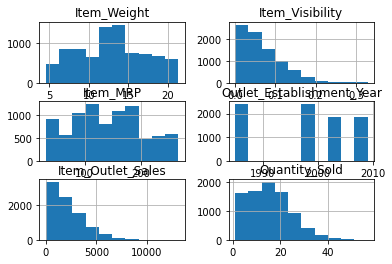

In [65]:
#C1 Histogram to view the distributions of various features in your dataset.
df.hist();

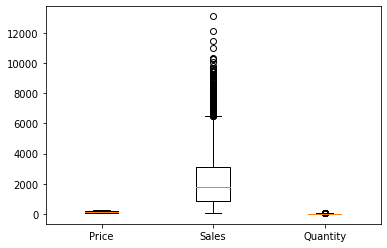

In [63]:
#C2 Boxplot to view statistical summaries of various features in your dataset.
#plt.boxplot(df["Item_Visibility"])
#plt.boxplot(df["Item_Outlet_Sales"])
#plt.show()

price = df["Item_MRP"]
sales = df["Item_Outlet_Sales"]
quantity = df["Quantity_Sold"]
plt.boxplot([price, sales, quantity], labels=["Price", "Sales", "Quantity"]);

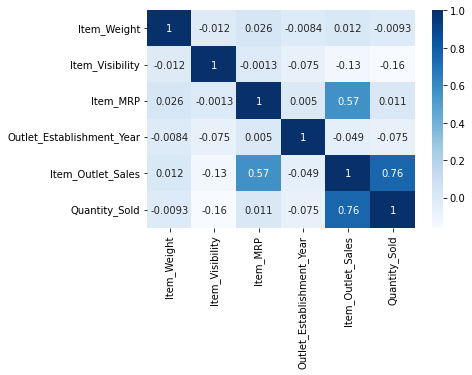

In [64]:
#C3 Heatmap of the correlation between features.

corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
